# MNIST Implemenation using Pytorch

In [1]:
## Packages
from loguru import logger
import matplotlib.pyplot as plt
import time

import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader

import dataset
import model

%matplotlib inline

In [2]:
RELOAD_DATA = False

## Download Data

In [3]:
mnist_dataset = dataset.fetch(train=True, download=RELOAD_DATA)
test_dataset = dataset.fetch(train=False)

## Visualize Data

In [4]:
example = 2

In [5]:
image_tensor, label = mnist_dataset[example]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 4


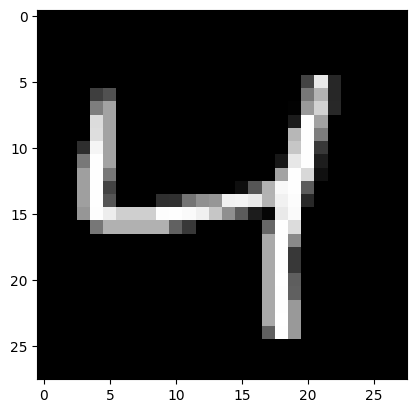

In [6]:
plt.imshow(image_tensor[0], cmap="gray")

## Split Data into Training and Testing Set

In [7]:
BATCH_SIZE = 128
TRAIN_SIZE = 0.8

In [8]:
train_data, validation_data = random_split(dataset=mnist_dataset, lengths=[TRAIN_SIZE, 1 - TRAIN_SIZE])

print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  48001
length of Validation Datasets:  11999


In [9]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=validation_data, batch_size=BATCH_SIZE, shuffle=False)

### Define Device

In [10]:
def get_device() -> torch.device:

    if torch.cuda.is_available():
        logger.info("Running on the GPU")
        n_gpu = 0 # different if you have more than 1
        assert n_gpu <= (torch.cuda.device_count() - 1)
        logger.info(f"Using gpu={n_gpu} out of {torch.cuda.device_count()}")
        device = torch.device(f"cuda:{n_gpu}")
    else:
        logger.info("Running on the CPU")
        device = torch.device("cpu")
    
    return device

DEVICE = get_device()
DEVICE

2024-02-23 19:11:03.891 | INFO     | __main__:get_device:10 - Running on the CPU


device(type='cpu')

## Create Pytorch Model

In [11]:
network = model.MnistModel().to(device=DEVICE)
network

MnistModel(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc_output): Linear(in_features=32, out_features=10, bias=True)
)

### Train Model

In [12]:
EPOCHS = 100
LEARNING_RATE = 0.01
OPTIMIZER_FUNC = torch.optim.SGD

In [13]:
history = model.fit(epochs=EPOCHS, lr=LEARNING_RATE, model=network, train_loader=train_loader, val_loader=val_loader, opt_func=OPTIMIZER_FUNC)

Epoch [0], val_loss: 2.3013, val_acc: 0.1562
Epoch [1], val_loss: 2.2995, val_acc: 0.1775
Epoch [2], val_loss: 2.2971, val_acc: 0.1707
Epoch [3], val_loss: 2.2935, val_acc: 0.1722
Epoch [4], val_loss: 2.2872, val_acc: 0.1987
Epoch [5], val_loss: 2.2747, val_acc: 0.2081
Epoch [6], val_loss: 2.2541, val_acc: 0.2352
Epoch [7], val_loss: 2.2326, val_acc: 0.2896
Epoch [8], val_loss: 2.2062, val_acc: 0.3792
Epoch [9], val_loss: 2.1524, val_acc: 0.4467
Epoch [10], val_loss: 2.0874, val_acc: 0.4532
Epoch [11], val_loss: 2.0237, val_acc: 0.4750
Epoch [12], val_loss: 1.9535, val_acc: 0.6044
Epoch [13], val_loss: 1.9027, val_acc: 0.6230
Epoch [14], val_loss: 1.8746, val_acc: 0.6289
Epoch [15], val_loss: 1.8643, val_acc: 0.6270
Epoch [16], val_loss: 1.8468, val_acc: 0.6392
Epoch [17], val_loss: 1.8382, val_acc: 0.6421
Epoch [18], val_loss: 1.8322, val_acc: 0.6451
Epoch [19], val_loss: 1.8253, val_acc: 0.6478
Epoch [20], val_loss: 1.8076, val_acc: 0.6771
Epoch [21], val_loss: 1.7928, val_acc: 0.701

### Plot Loss of Model

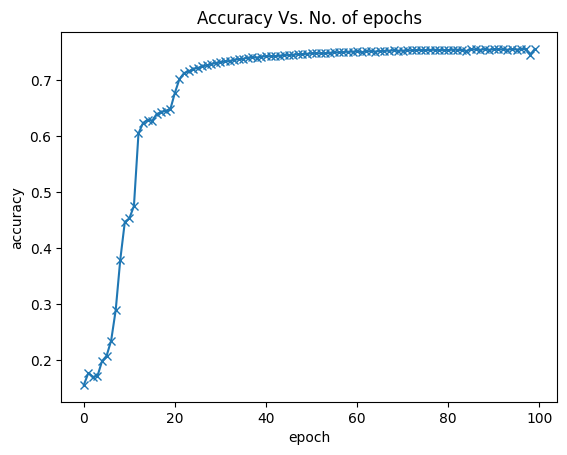

In [14]:
plt.plot([result['val_acc'] for result in history], "-x")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')
plt.show()

### Save Model

In [15]:
model.save(model=network)

### Load Model

In [12]:
loaded_network = model.load(name=model.MODEL_NAME.format(time=model.LATEST))
loaded_network

MnistModel(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc_output): Linear(in_features=32, out_features=10, bias=True)
)

In [13]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = model.evaluate(loaded_network, test_loader)
result

{'val_loss': 1.703586220741272, 'val_acc': 0.7591797113418579}